In [1]:
import pandas as pd 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv(r'C:\Users\Malek\Documents\DataScientist\model linieare\datasets\3\winequality-white.csv' ,
                   sep =';' )

In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
# on veut creer des matrices Numpy
X = data.as_matrix(data.columns[:-1])
X.shape

C:\Users\Malek\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(4898, 11)

In [13]:
y = data.as_matrix([data.columns[-1]])
y = y.flatten()
y.shape

C:\Users\Malek\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(4898,)

C:\Users\Malek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


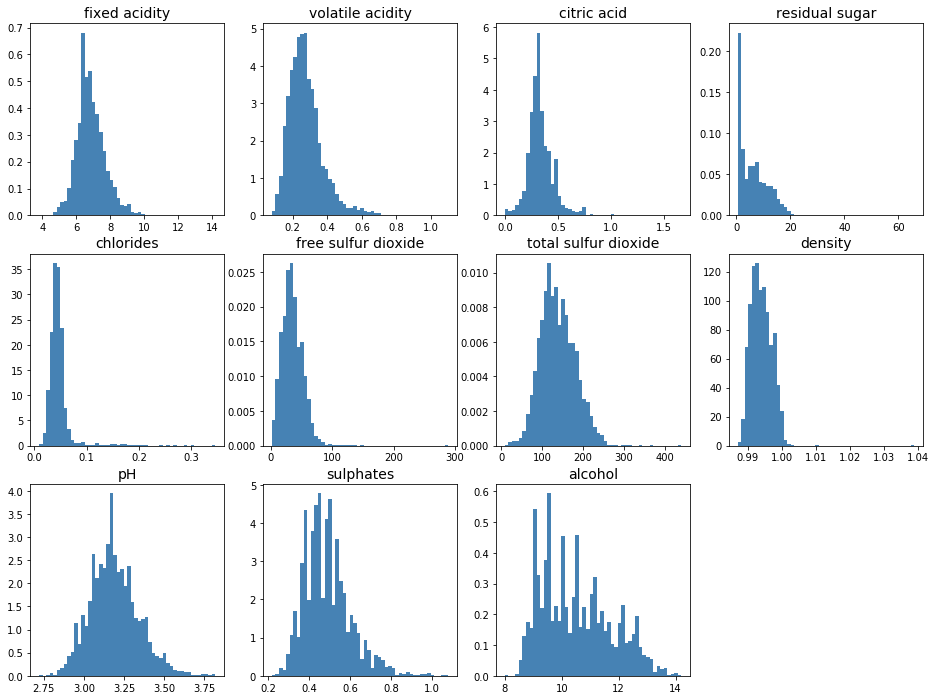

In [15]:
# Create a hist for each feature 
fig = plt.figure(figsize=(16,12))
for feat_idx in range(X.shape[1]):
    ax = fig.add_subplot(3,4,(feat_idx+1))
    h=ax.hist(X[:,feat_idx] , bins=50 , color='steelblue'
             , normed = True , edgecolor = 'none')
    ax.set_title(data.columns[feat_idx] , fontsize = 14)
    

In [17]:
absc = range(np.min(y) , np.max(y))
absc

range(3, 9)

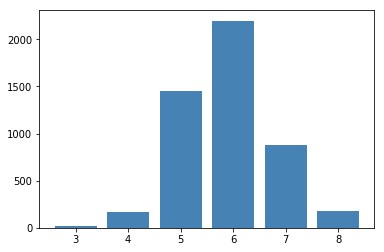

In [25]:
b=plt.bar(absc ,[(y==a).sum() for a in absc] ,color = 'steelblue')

In [29]:
y_class = np.where(y < 6 , 0 , 1 )
y_class[y_class == 0].shape

(1640,)

In [33]:
from sklearn import model_selection
X_train , X_test , y_train , y_test = model_selection.train_test_split(X, y_class , test_size = 0.3)

In [34]:
from sklearn import preprocessing
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

C:\Users\Malek\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


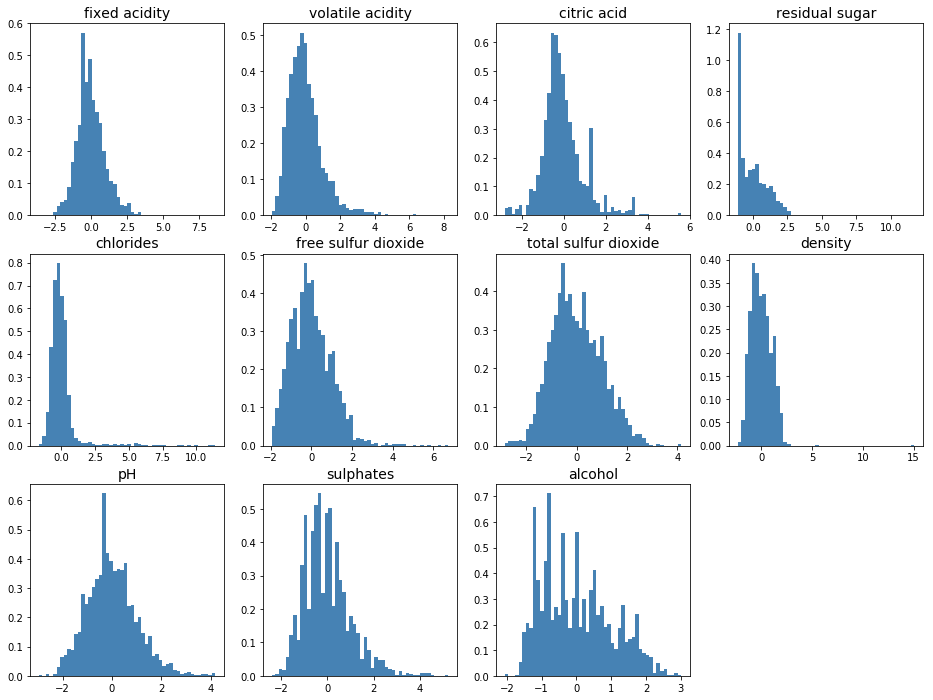

In [35]:
# Create a hist for each feature 
fig = plt.figure(figsize=(16,12))
for feat_idx in range(X_train_std.shape[1]):
    ax = fig.add_subplot(3,4,(feat_idx+1))
    h=ax.hist(X_train_std[:,feat_idx] , bins=50 , color='steelblue'
             , normed = True , edgecolor = 'none')
    ax.set_title(data.columns[feat_idx] , fontsize = 14)
    

## K_NN

In [36]:
from sklearn import neighbors

In [39]:
clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier()
                                  , {'n_neighbors' : [3,5,7,9,11,13,15]},
                                  cv=5, scoring='accuracy')


In [40]:
clf.fit(X_train_std, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [41]:
clf.best_params_

{'n_neighbors': 15}

In [84]:
for mean , std , params in zip (clf.cv_results_['mean_test_score'],
                                clf.cv_results_['std_test_score'],
                               clf.cv_results_['params']):
    print ("\taccuracy = %0.4f"%mean+" (+/-%0.3f"%std*2 +") for %s"%params)
    

	accuracy = 0.7480 (+/-0.021 (+/-0.021) for {'n_neighbors': 3}
	accuracy = 0.7436 (+/-0.020 (+/-0.020) for {'n_neighbors': 5}
	accuracy = 0.7439 (+/-0.021 (+/-0.021) for {'n_neighbors': 7}
	accuracy = 0.7482 (+/-0.017 (+/-0.017) for {'n_neighbors': 9}
	accuracy = 0.7555 (+/-0.013 (+/-0.013) for {'n_neighbors': 11}
	accuracy = 0.7518 (+/-0.009 (+/-0.009) for {'n_neighbors': 13}
	accuracy = 0.7564 (+/-0.014 (+/-0.014) for {'n_neighbors': 15}


In [87]:
y_pred = clf.predict(X_test_std)

In [89]:
from sklearn import metrics
metrics.accuracy_score(y_test , y_pred)

0.7714285714285715